# Libraries and Data

In [ ]:
# Install the chronos library and time series database
!pip install -q git+https://github.com/amazon-science/chronos-forecasting.git
!pip install -q tsdb

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.9 MB/s eta 0:00:00


In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
from sklearn.model_selection import ParameterGrid

import tsdb
from chronos import ChronosPipeline
from datetime  import datetime
import torch

2025-07-15 12:13:38 [WARNING]: ‼️ PyPOTS Ecosystem configuration file does not exist.
2025-07-15 12:13:38 [INFO]: Wrote new configs to config.ini successfully.
2025-07-15 12:13:38 [INFO]: 💫 Initialized PyPOTS Ecosystem configuration file /root/.pypots/config.ini successfully.


In [ ]:
# Load the Data from TSDB library
# Air quality data of sites in beijing
df = pd.DataFrame(tsdb.load('beijing_multisite_air_quality')['X'])
df.head()

2025-07-15 12:14:03 [INFO]: You're using dataset beijing_multisite_air_quality, please cite it properly in your work. You can find its reference information at the below link: 
https://github.com/WenjieDu/TSDB/tree/main/dataset_profiles/beijing_multisite_air_quality
2025-07-15 12:14:03 [INFO]: Start downloading...
2025-07-15 12:14:04 [INFO]: Successfully downloaded data to /tmp/tmpc5b_npy2/PRSA2017_Data_20130301-20170228.zip
2025-07-15 12:14:04 [INFO]: Successfully extracted data to /root/.pypots/tsdb/beijing_multisite_air_quality
2025-07-15 12:14:04 [INFO]: Reading /root/.pypots/tsdb/beijing_multisite_air_quality/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv, data shape (35064, 18)
2025-07-15 12:14:04 [INFO]: Reading /root/.pypots/tsdb/beijing_multisite_air_quality/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv, data shape (35064, 18)
2025-07-15 12:14:05 [INFO]: Reading /root/.pypots/tsdb/beijing_multisite_air_quality/PRSA_Data_20130301-

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [ ]:
# Display information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [ ]:
# Rename the 'TEMP' column as 'y'
df = df.rename(columns = {'TEMP': 'y'})
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,y,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [ ]:
# Function to create a datetime variable from year, month, day, and hour columns
def clean_datetime(df):
  dttime = str(df['year']) + "-" + str(df['month']) + "-" + str(df['day']) + " " + str(df['hour']) + ":00:00"
  return datetime.strptime(dttime, '%Y-%m-%d %H:%M:%S')


# Apply the function to create a new datetime column 'ds'
df['ds'] = df.apply(clean_datetime, axis = 1)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,y,PRES,DEWP,RAIN,wd,WSPM,station,ds
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,2013-03-01 00:00:00
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan,2013-03-01 01:00:00
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan,2013-03-01 03:00:00
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan,2013-03-01 04:00:00


In [ ]:
# Set the 'ds' column as the index of the dataframe
df = df.set_index('ds')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,y,PRES,DEWP,RAIN,wd,WSPM,station
ds,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
2013-03-01 01:00:00,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2013-03-01 02:00:00,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [ ]:
# Zooming in on Wanliu
# Filter the dataframe to include only the data from the 'Wanliu' station and select the 'y' column
df = df.loc[df["station"] == "Wanliu"]["y"]
df.head()

,y
ds,
2013-03-01 00:00:00,-0.7
2013-03-01 01:00:00,-1.1
2013-03-01 02:00:00,-1.1
2013-03-01 03:00:00,-1.4
2013-03-01 04:00:00,-2.0


In [ ]:
# Set the frequency of the DataFrame to hourly
df = df.asfreq("h")

/tmp/ipython-input-9-1473438227.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.asfreq("H")


# Exploratory Data Analysis

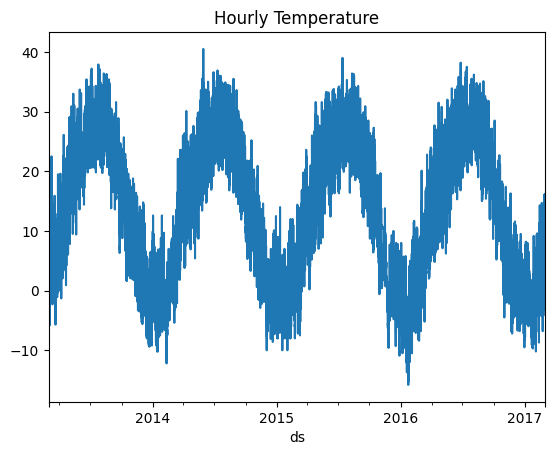

In [ ]:
# Plot the hourly temperature data
df.plot(title = 'Hourly Temperature')
plt.show()

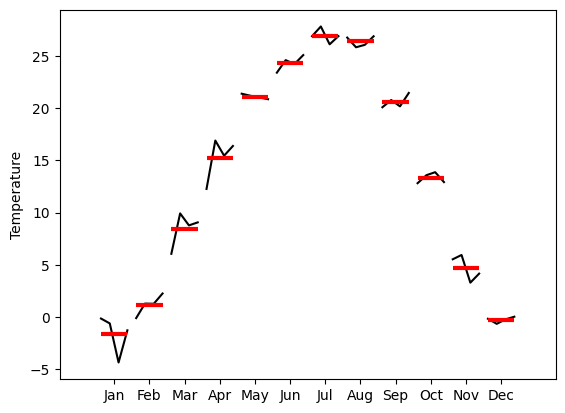

In [ ]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of temperature
month_plot(df.resample('ME').mean(),
           ylabel = 'Temperature')
plt.show()

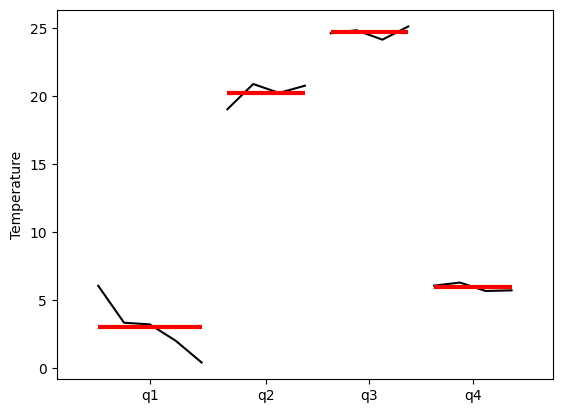

In [ ]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of temperature
quarter_plot(df.resample('QE').mean(),
           ylabel = 'Temperature')
plt.show()

In [ ]:
# There is an hourly seasonality in the data

# Amazon Chronos Model

In [ ]:
# Start a pipeline from the pretrained model using ChronosPipeline
# amazon/chronos-t5-large
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-base"
)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/806M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

In [ ]:
# Print the documentation for the 'predict' method in ChronosPipeline
print(ChronosPipeline.predict.__doc__)


        Get forecasts for the given time series.

        Refer to the base method (``BaseChronosPipeline.predict``)
        for details on shared parameters.

        Additional parameters
        ---------------------
        num_samples
            Number of sample paths to predict. Defaults to what
            specified in ``self.model.config``.
        temperature
            Temperature to use for generating sample tokens.
            Defaults to what specified in ``self.model.config``.
        top_k
            Top-k parameter to use for generating sample tokens.
            Defaults to what specified in ``self.model.config``.
        top_p
            Top-p parameter to use for generating sample tokens.
            Defaults to what specified in ``self.model.config``.
        limit_prediction_length
            Force prediction length smaller or equal than the
            built-in prediction length from the model. False by
            default. When true, fail loudly if longer p

In [ ]:
# Build the forecast using the ChronosPipeline's predict method
forecast = pipeline.predict(
    context=torch.tensor(df),          # Pass the time series data as a tensor
    temperature=1.0,                   # Set the sampling temperature for prediction
    top_k=50,                          # Limit the number of highest probability vocabulary tokens to keep for top-k-filtering
    top_p=1.0,                         # Set the cumulative probability for nucleus sampling
    prediction_length=72,              # Define the number of steps to predict into the future
    num_samples=20,                    # Specify the number of samples to generate
    limit_prediction_length=False      # Allow predictions longer than the context size
)

/tmp/ipython-input-17-3447265206.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  context=torch.tensor(df),          # Pass the time series data as a tensor


In [ ]:
# Get the forecasts by calculating the mean of the predicted samples
forecast_mean = torch.mean(torch.stack([f[0] for f in forecast]), dim = 0)
forecast_mean

tensor([ 7.2054,  6.0943,  4.3098,  2.2896,  2.7946,  1.7845, -0.0673, -0.5050,
        -0.0673,  4.5791,  7.7104, 10.2020, 11.8181, 13.0976, 14.1750, 14.7811,
        14.3434, 13.5690, 11.6161,  9.7979,  8.9225,  8.3838,  7.7104,  6.7003,
         4.9158,  4.0067,  3.5017,  2.4916,  2.7946,  1.0101,  1.2121, -0.6397,
         1.9865,  7.9798, 10.8080, 12.1548, 13.2660, 14.2424, 14.4781, 14.2424,
        14.4444, 13.8720, 12.8282, 12.1548, 11.8855, 11.6161, 11.6161, 11.0101,
        10.4713, 10.4377, 10.5724, 10.7407,  9.7979,  8.5858,  6.1953,  4.3098,
         6.0943,  9.3939, 11.7171, 12.3569, 13.5690, 14.4444, 14.9158, 14.9831,
        11.8701, 11.5686, 10.4005,  9.0062,  7.3105,  6.4814,  5.0872,  4.5973])

# Cross-Validation

In [ ]:
# Define the forecast horizon (number of hours to forecast) and stride (step size for sliding window)
forecast_horizon = 72
stride = 48

# Determine the starting date for cross-validation, using a window of the forecast horizon multiplied by 10
start_date = df.index[-forecast_horizon * 10]
print(start_date)

# Determine the end date of the dataset
end_date = df.index[-1]
print(end_date)

2017-01-30 00:00:00
2017-02-28 23:00:00


In [ ]:
def time_series_cv(pipeline, df, forecast_horizon, stride, start_date, end_date):
  # Initialize an empty list to store results
  results = []
  # Set the current date to the start date
  current_date = start_date

  while current_date + pd.Timedelta(hours = forecast_horizon) <= end_date:
    # Define the training and test sets based on the current date
    train = df[df.index < current_date]
    test = df[current_date : current_date + pd.Timedelta(hours = forecast_horizon - 1)]

    # Generate forecasts using the pipeline
    forecast = pipeline.predict(context = torch.tensor(train.values),
                              temperature = 1.0,
                              top_k = 50,
                              top_p = 1.0,
                              prediction_length = 72,
                              num_samples = 20,
                              limit_prediction_length = False)
    forecast_mean = torch.mean(torch.stack([f[0] for f in forecast]), dim = 0)

    # Compute and print the RMSE for the forecasts
    error = np.sqrt(mean_squared_error(torch.tensor(test.values),
                                      forecast_mean))
    print(f"The RMSE is {error}")
    results.append((current_date, error))

    # Move to the next time window
    current_date += pd.Timedelta(hours = stride)

  return results

In [ ]:
# Test the time series cross-validation function with the defined parameters
results = time_series_cv(pipeline,
                         df,
                         forecast_horizon,
                         stride,
                         start_date,
                         end_date)

The RMSE is 3.933885651311205


The RMSE is 3.616960985056537


The RMSE is 7.167528331841562


The RMSE is 3.720153623155665


The RMSE is 2.1967423201821945


The RMSE is 4.246981713317939


The RMSE is 4.32479484207634


The RMSE is 3.1402542487380347


The RMSE is 4.105874061441129


The RMSE is 2.9643190415566636


The RMSE is 4.468440437920903


The RMSE is 3.722460518786534


The RMSE is 4.246418121695509
The RMSE is 4.943340215493661


In [ ]:
# Convert the results list to a DataFrame for easier handling and visualization
results_df = pd.DataFrame(results, columns=["Date", "RMSE"])

# Print the average RMSE across all cross-validation splits
print(f"The average RMSE is {results_df['RMSE'].mean()}")

# Display the DataFrame containing the RMSE results for each date
results_df

The average RMSE is 4.057011008040992


,Date,RMSE
0,2017-01-30,3.933886
1,2017-02-01,3.616961
2,2017-02-03,7.167528
3,2017-02-05,3.720154
4,2017-02-07,2.196742
5,2017-02-09,4.246982
6,2017-02-11,4.324795
7,2017-02-13,3.140254
8,2017-02-15,4.105874
9,2017-02-17,2.964319


# Cross Validation with Data Viz

In [ ]:
def time_series_cv(pipeline, df, forecast_horizon, stride, start_date, end_date):
  # Initialize lists to store results, predictions, and actuals
  results = []
  all_predictions = []
  all_actuals = []

  # Set the initial date for the cross-validation loop
  current_date = start_date

  while current_date + pd.Timedelta(hours = forecast_horizon) <= end_date:
    # Split the data into training and test sets
    train = df[df.index < current_date]
    test = df[current_date : current_date + pd.Timedelta(hours = forecast_horizon - 1)]

    # Generate forecasts from the model pipeline
    forecast = pipeline.predict(context = torch.tensor(train.values),
                              temperature = 1.0,
                              top_k = 50,
                              top_p = 1.0,
                              prediction_length = 72,
                              num_samples = 20,
                              limit_prediction_length = False)
    forecast_mean = torch.mean(torch.stack([f[0] for f in forecast]), dim = 0)

    # Store the forecasts and actual values
    all_predictions.append(forecast_mean.numpy())
    all_actuals.append(torch.tensor(test.values).numpy())

    # Calculate the RMSE for the current forecast
    error = np.sqrt(mean_squared_error(torch.tensor(test.values),
                                      forecast_mean))
    print(f"The RMSE is {error}")
    results.append((current_date, error))

    # Move to the next date for the next iteration
    current_date += pd.Timedelta(hours = stride)

  return results, all_predictions, all_actuals

In [ ]:
# Apply the cross-validation function to evaluate the model
results, all_predictions, all_actuals = time_series_cv(pipeline,
                                                        df,
                                                        forecast_horizon,
                                                        stride,
                                                        start_date,
                                                        end_date)

The RMSE is 2.413680618001552


The RMSE is 3.7484652752766126


The RMSE is 4.357049139486026


The RMSE is 2.43503893688349


The RMSE is 2.5626716393858353


The RMSE is 3.7786815274844283


The RMSE is 7.6552159836404226


The RMSE is 5.3110053922177185


The RMSE is 2.922386341480445


The RMSE is 3.3596340730123053


The RMSE is 2.8001147234788006


The RMSE is 3.1745554794506217


The RMSE is 6.1066866249324665
The RMSE is 5.876846658718125


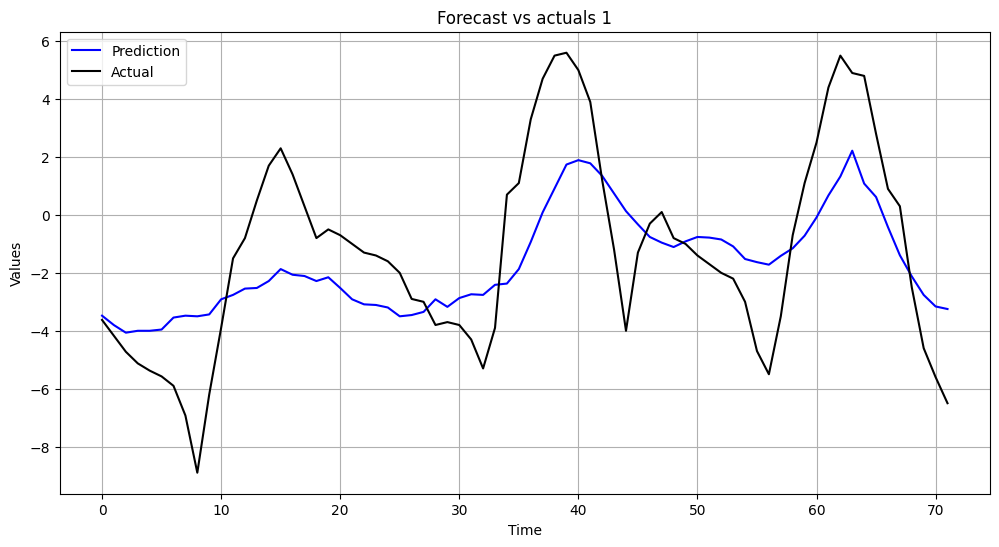

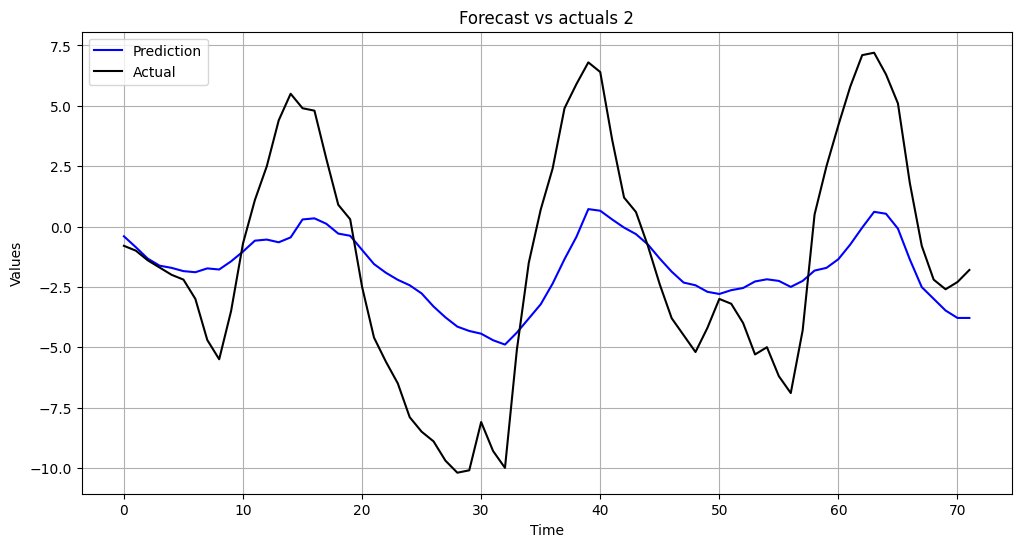

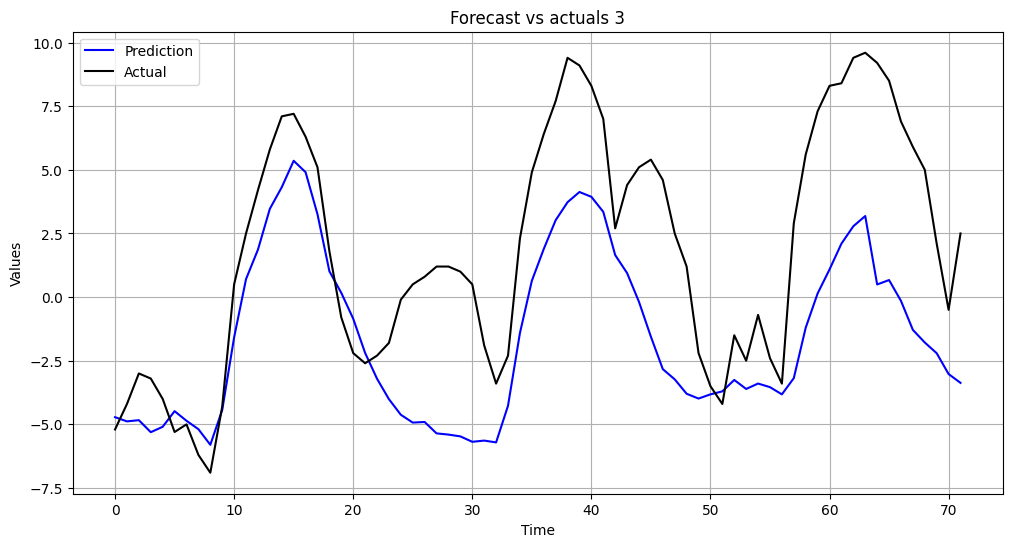

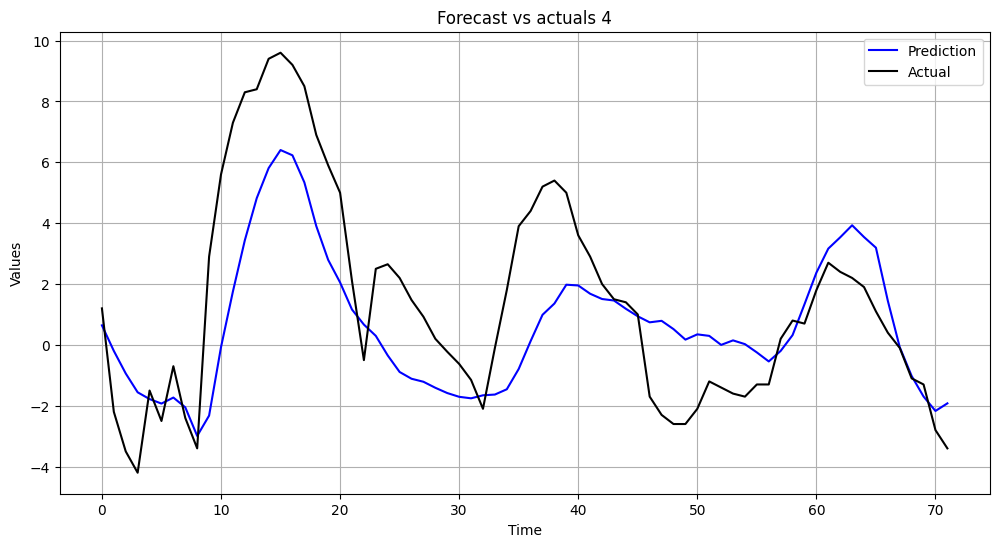

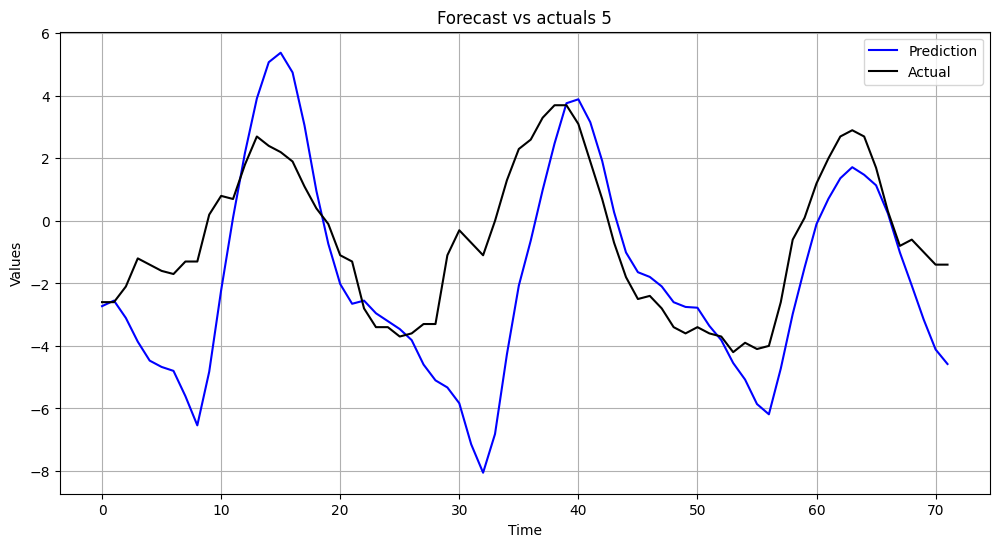

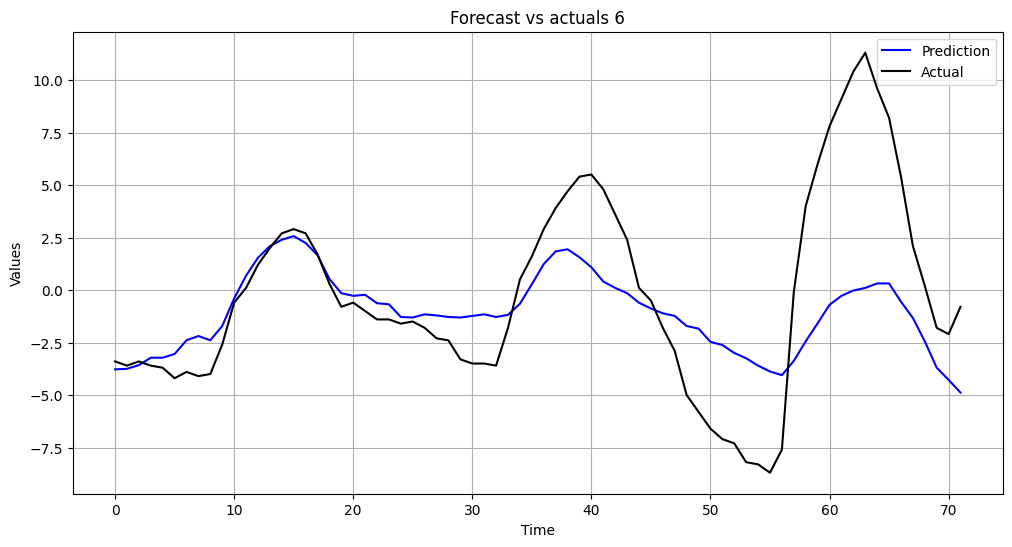

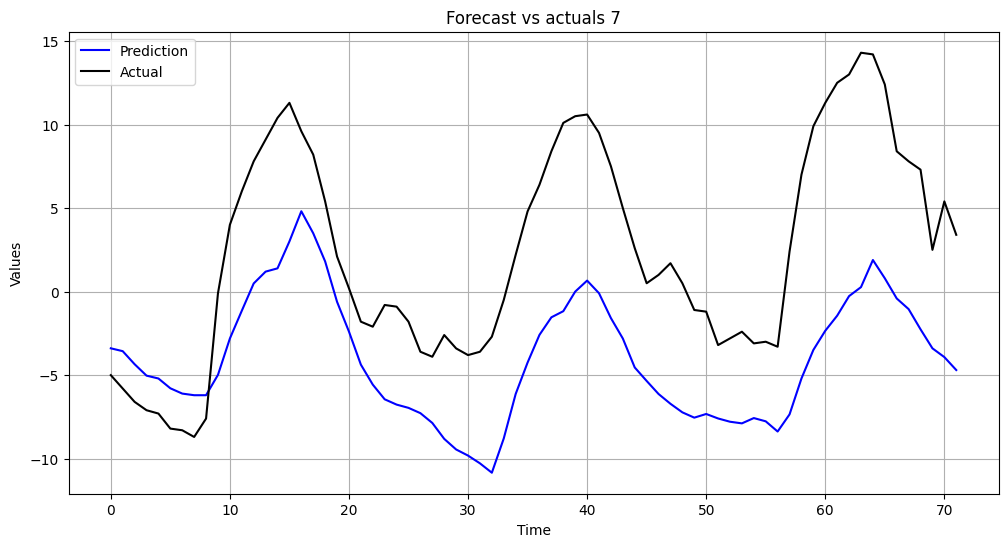

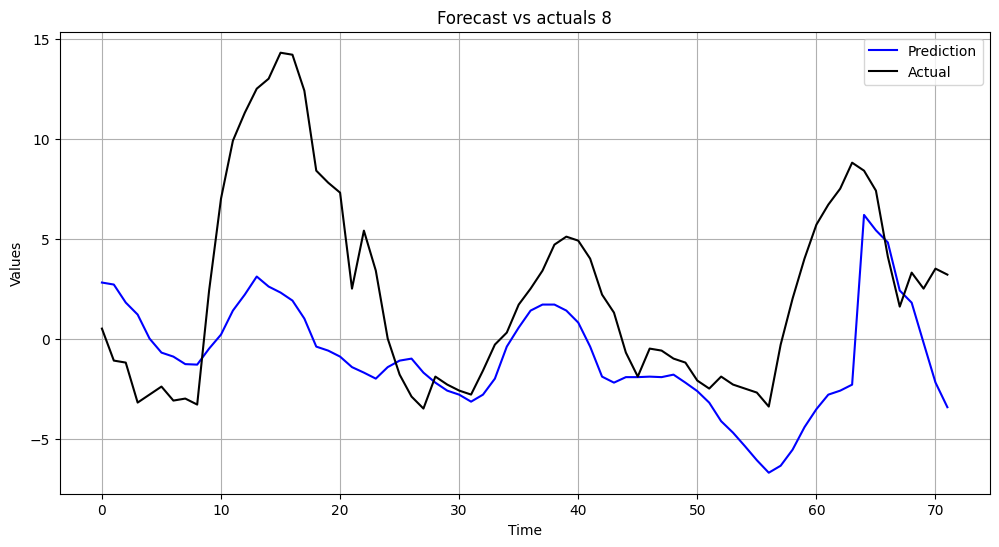

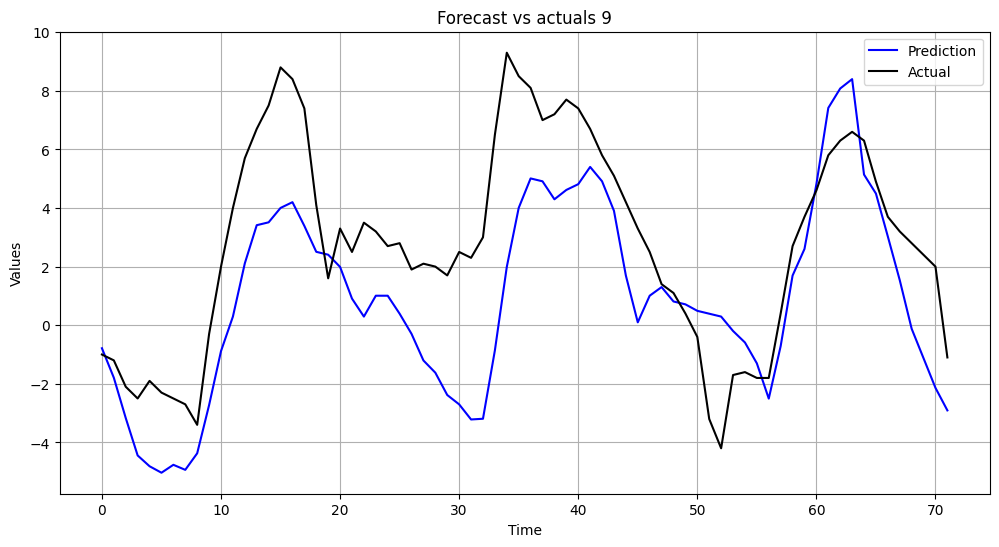

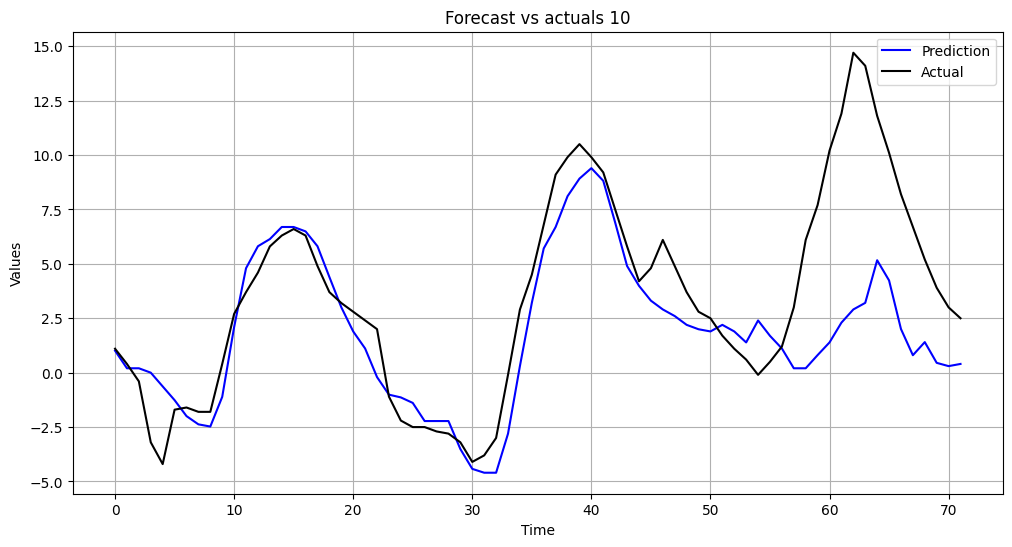

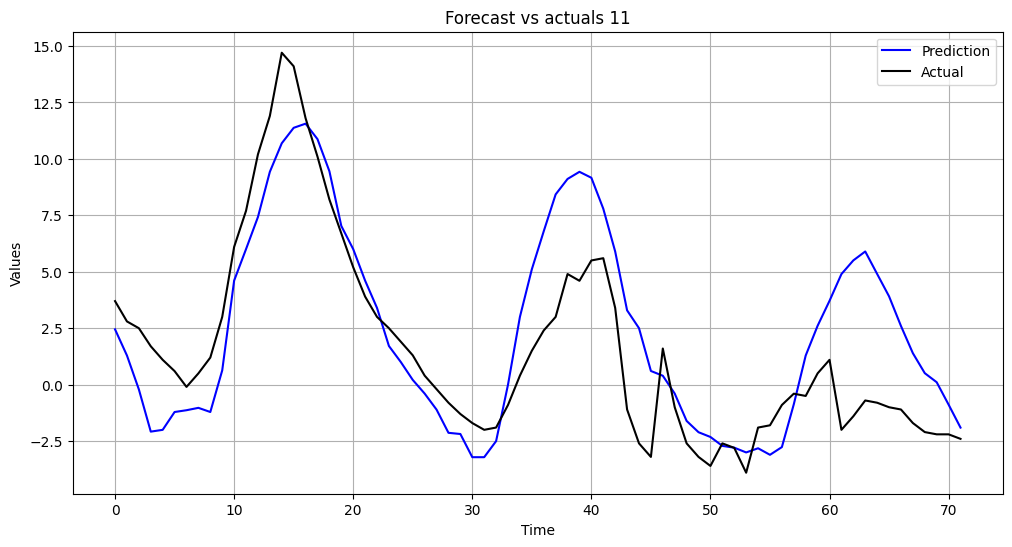

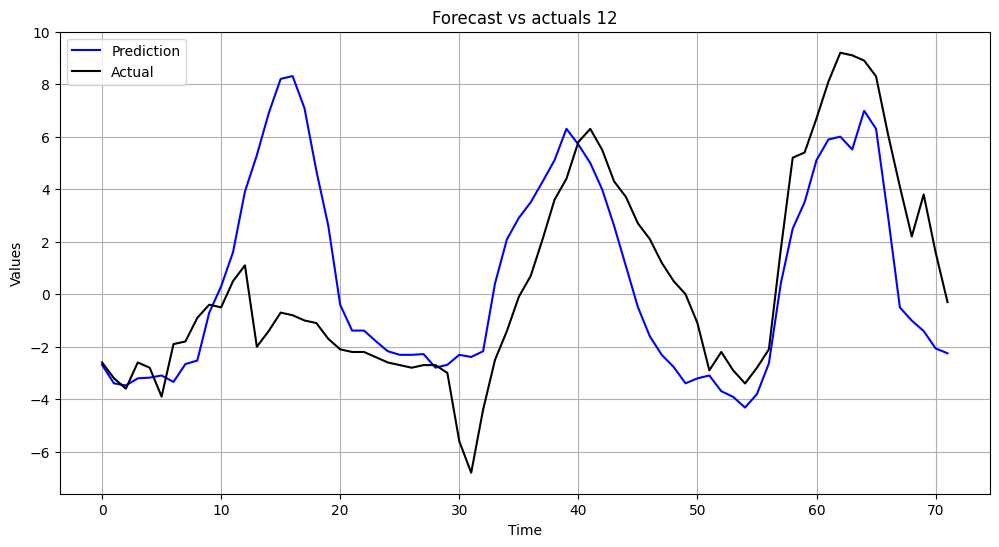

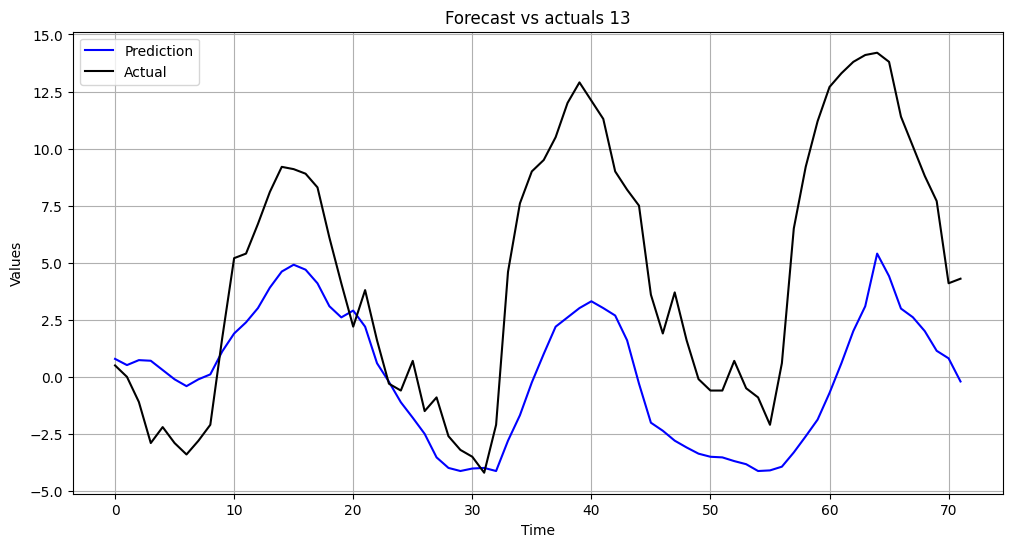

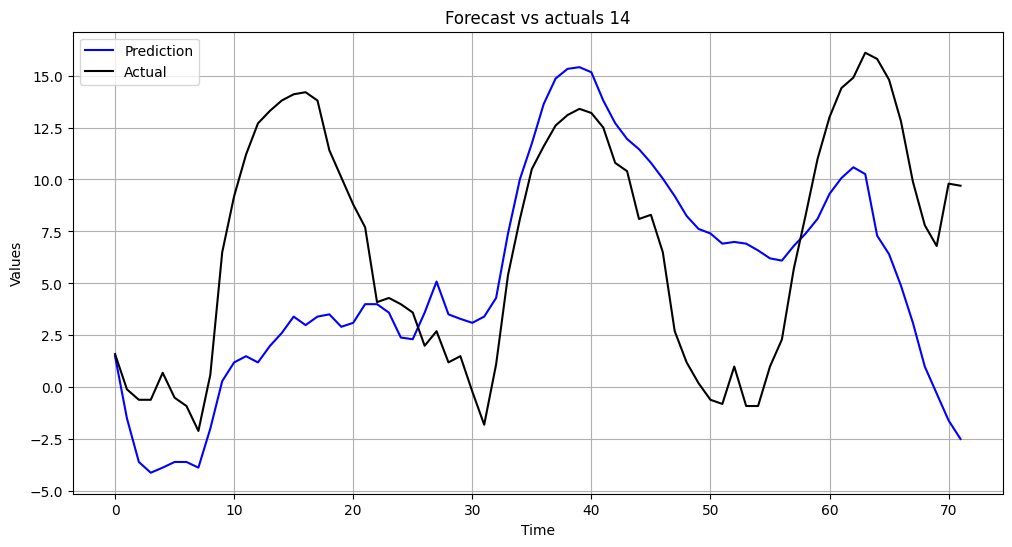

In [ ]:
# Plot the predictions and actual values
for i in range(len(all_predictions)):
  # set figure size
  plt.figure(figsize = (12, 6))

  # predictions
  plt.plot(all_predictions[i], label = "Prediction", color = "blue")
  # actual
  plt.plot(all_actuals[i], label = "Actual", color = "black")

  # set title, legend, and axis
  plt.title(f"Forecast vs actuals {i + 1}")
  plt.ylabel("Values")
  plt.xlabel("Time")
  plt.legend()
  plt.grid(True)
  plt.show()

### Challenge: Improve the function and the data viz

# Parameter Tuning

In [ ]:
import random

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    "temperature": [0.1, 0.5, 1.0, 1.5],  # Controls randomness in the predictions
    "top_k": [10, 30, 50, 100],          # Number of top predictions to consider
    "top_p": [0.1, 0.5, 0.75, 1.0],      # Cumulative probability for sampling predictions
    "num_samples": [5, 10, 20, 50]        # Number of samples to draw for each prediction
}

In [ ]:
# Generate all possible combinations of hyperparameters from the grid
param_combinations = list(ParameterGrid(param_grid))

In [ ]:
# Sample a subset of N combinations from the generated list
random.seed(1502)  # Set seed for reproducibility
sampled_combinations = random.sample(param_combinations, 10)  # Sample 10 combinations

sampled_combinations

[{'num_samples': 10, 'temperature': 0.5, 'top_k': 30, 'top_p': 0.75},
 {'num_samples': 50, 'temperature': 1.5, 'top_k': 30, 'top_p': 0.5},
 {'num_samples': 20, 'temperature': 0.1, 'top_k': 30, 'top_p': 1.0},
 {'num_samples': 50, 'temperature': 0.5, 'top_k': 100, 'top_p': 0.1},
 {'num_samples': 20, 'temperature': 1.5, 'top_k': 10, 'top_p': 1.0},
 {'num_samples': 5, 'temperature': 0.5, 'top_k': 30, 'top_p': 0.1},
 {'num_samples': 50, 'temperature': 1.0, 'top_k': 10, 'top_p': 0.1},
 {'num_samples': 20, 'temperature': 0.5, 'top_k': 100, 'top_p': 0.75},
 {'num_samples': 5, 'temperature': 1.5, 'top_k': 50, 'top_p': 0.75},
 {'num_samples': 50, 'temperature': 1.0, 'top_k': 100, 'top_p': 1.0}]

In [ ]:
def time_series_cv_tuning(pipeline, df, forecast_horizon, stride, start_date, end_date, params):
  # Initialize lists to store results, predictions, and actuals
  results = []
  all_predictions = []
  all_actuals = []

  # Set the initial date for the cross-validation loop
  current_date = start_date

  while current_date + pd.Timedelta(hours = forecast_horizon) <= end_date:
    # Split the data into training and test sets
    train = df[df.index < current_date]
    test = df[current_date : current_date + pd.Timedelta(hours = forecast_horizon - 1)]

    # Generate forecasts from the model pipeline
    forecast = pipeline.predict(context = torch.tensor(train.values),
                              temperature = params['temperature'],
                              top_k = params['top_k'],
                              top_p = params['top_p'],
                              prediction_length = forecast_horizon,
                              num_samples = params['num_samples'],
                              limit_prediction_length = False)
    forecast_mean = torch.mean(torch.stack([f[0] for f in forecast]), dim = 0)

    # Store the forecasts and actual values
    all_predictions.append(forecast_mean.numpy())
    all_actuals.append(torch.tensor(test.values).numpy())

    # Calculate the RMSE for the current forecast
    error = np.sqrt(mean_squared_error(torch.tensor(test.values),
                                      forecast_mean))
    print(f"The RMSE is {error}")
    results.append((current_date, error))

    # Move to the next date for the next iteration
    current_date += pd.Timedelta(hours = stride)

  return results, all_predictions, all_actuals

In [ ]:
# Initialize a list to store RMSE results
rmse_results = []

for params in sampled_combinations:
  # Perform cross-validation with the current set of parameters
  results, _, _ = time_series_cv_tuning(pipeline,
                                        df,
                                        forecast_horizon,
                                        stride,
                                        start_date,
                                        end_date,
                                        params)

  # Calculate and store the mean RMSE for the current parameter set
  mean_rmse = np.mean([error for _, error in results])
  rmse_results.append({**params, 'rmse': mean_rmse})

  # Print the RMSE for the current parameter set
  print(f"RMSE for {params}: {mean_rmse}")


The RMSE is 2.420928137299186


The RMSE is 3.938920157620136


The RMSE is 6.57000426047689


The RMSE is 5.092716448076737


The RMSE is 2.2005771600714845


The RMSE is 4.014318992348794


The RMSE is 6.429477763900965


The RMSE is 3.6833232223910555


The RMSE is 3.3000218677332738


The RMSE is 3.224373922656646


The RMSE is 2.8739258236792793


The RMSE is 3.1309749238533535


The RMSE is 5.360943600664709


The RMSE is 5.831440696735617
RMSE for {'num_samples': 10, 'temperature': 0.5, 'top_k': 30, 'top_p': 0.75}: 4.147996212679152


The RMSE is 2.576857912386976


The RMSE is 3.551256150011815


The RMSE is 5.985121047677882


The RMSE is 3.1278783389400515


The RMSE is 2.0308483307925793


The RMSE is 4.010624724526935


The RMSE is 5.081645844999798


The RMSE is 3.7180775117748768


The RMSE is 3.7749528999413138


The RMSE is 3.2614707127014397


The RMSE is 2.916739816285694


The RMSE is 2.8736978173778223


The RMSE is 4.884518979594457


The RMSE is 5.796240809011415
RMSE for {'num_samples': 50, 'temperature': 1.5, 'top_k': 30, 'top_p': 0.5}: 3.8278522068587897


The RMSE is 2.600748740655373


The RMSE is 3.6009014208194494


The RMSE is 6.342553385663188


The RMSE is 3.554624843565233


The RMSE is 2.239778406499297


The RMSE is 3.959386998575364


The RMSE is 5.650309519011081


The RMSE is 4.021032866755466


The RMSE is 3.857335215504573


The RMSE is 3.5355282649105315


The RMSE is 3.133261946755759


The RMSE is 2.854656320357086


The RMSE is 5.424733088305172


The RMSE is 5.983940774332142
RMSE for {'num_samples': 20, 'temperature': 0.1, 'top_k': 30, 'top_p': 1.0}: 4.054199413693551


The RMSE is 2.7625656164872434


The RMSE is 3.8078397086197326


The RMSE is 5.749027798164589


The RMSE is 3.329225522932599


The RMSE is 2.113817734502245


The RMSE is 3.6234481575563913


The RMSE is 5.940443799369307


The RMSE is 3.7404361234269223


The RMSE is 3.9100779747339485


The RMSE is 4.132269642912878


The RMSE is 2.884857097412143


The RMSE is 3.0675693425183264


The RMSE is 5.566838378083379


The RMSE is 6.2475021740240475
RMSE for {'num_samples': 50, 'temperature': 0.5, 'top_k': 100, 'top_p': 0.1}: 4.062565647910269


The RMSE is 2.368649670660828


The RMSE is 3.477325968276098


The RMSE is 6.2535376296394


The RMSE is 3.0884719490941084


The RMSE is 2.5643650319076436


The RMSE is 3.8584263091538267


The RMSE is 4.273480208427026


The RMSE is 3.403093475016482


The RMSE is 3.3178882591165255


The RMSE is 6.808964095399568


The RMSE is 3.0071205265190866


The RMSE is 3.421516337209111


The RMSE is 5.268794166174616


The RMSE is 6.540674424531156
RMSE for {'num_samples': 20, 'temperature': 1.5, 'top_k': 10, 'top_p': 1.0}: 4.118022003651819


The RMSE is 2.726681148834984


The RMSE is 3.9381357264911894


The RMSE is 5.951589747034541


The RMSE is 3.1132427822051825


The RMSE is 1.9856096826942302


The RMSE is 4.296321979584991


The RMSE is 5.940443799369307


The RMSE is 3.7404361234269223


The RMSE is 3.9100779747339485


The RMSE is 4.132269642912878


The RMSE is 2.925885997586372


The RMSE is 3.1731671120512335


The RMSE is 5.566838378083379


The RMSE is 8.395718067900264
RMSE for {'num_samples': 5, 'temperature': 0.5, 'top_k': 30, 'top_p': 0.1}: 4.271172725922101


The RMSE is 2.923400880994134


The RMSE is 3.804784820894963


The RMSE is 6.656445837196955


The RMSE is 2.9988188935378743


The RMSE is 1.8574348337719737


The RMSE is 4.606415743187881


The RMSE is 5.940443799369307


The RMSE is 3.7404361234269223


The RMSE is 3.9100779747339485


The RMSE is 4.132269642912878


The RMSE is 2.925885997586372


The RMSE is 3.1731671120512335


The RMSE is 5.566838378083379


The RMSE is 6.06831804265237
RMSE for {'num_samples': 50, 'temperature': 1.0, 'top_k': 10, 'top_p': 0.1}: 4.164624148600014


The RMSE is 2.666388018543982


The RMSE is 3.494183608043049


The RMSE is 5.846708127810509


The RMSE is 1.946074307248335


The RMSE is 2.273853909085829


The RMSE is 3.8045802643788496


The RMSE is 5.080275546970809


The RMSE is 4.055044372439859


The RMSE is 3.1247060559969193


The RMSE is 3.9965645044578904


The RMSE is 3.198060658928848


The RMSE is 3.0034301043699796


The RMSE is 4.583894180504261


The RMSE is 4.966481239823557
RMSE for {'num_samples': 20, 'temperature': 0.5, 'top_k': 100, 'top_p': 0.75}: 3.7171603499001913


The RMSE is 3.4557399181859174


The RMSE is 3.1841122584069086


The RMSE is 4.504843625182269


The RMSE is 4.134812392889987


The RMSE is 2.6920193750525243


The RMSE is 4.0158001028510775


The RMSE is 5.9985042510337365


The RMSE is 4.57197997058731


The RMSE is 4.227066586104941


The RMSE is 3.8603648705920106


The RMSE is 5.886784257523378


The RMSE is 3.186216517620001


The RMSE is 3.822326824636827


The RMSE is 4.415921071700886
RMSE for {'num_samples': 5, 'temperature': 1.5, 'top_k': 50, 'top_p': 0.75}: 4.139749430169126


The RMSE is 2.6668085286335073


The RMSE is 3.289686110996186


The RMSE is 8.101717951478015


The RMSE is 3.453807217167014


The RMSE is 2.5753604121824734


The RMSE is 3.2979122914098156


The RMSE is 6.173316469153583


The RMSE is 2.884522257518565


The RMSE is 2.675567281275539


The RMSE is 4.001265291590495


The RMSE is 3.5217264327910636


The RMSE is 4.398068983614928


The RMSE is 4.370084226230522
The RMSE is 6.2872576596874366
RMSE for {'num_samples': 50, 'temperature': 1.0, 'top_k': 100, 'top_p': 1.0}: 4.12122150812351


In [ ]:
# Put the result in a DataFrame
rmse_df = pd.DataFrame(rmse_results)
rmse_df

,num_samples,temperature,top_k,top_p,rmse
0,10,0.5,30,0.75,4.147996
1,50,1.5,30,0.50,3.827852
2,20,0.1,30,1.00,4.054199
3,50,0.5,100,0.10,4.062566
4,20,1.5,10,1.00,4.118022
5,5,0.5,30,0.10,4.271173
6,50,1.0,10,0.10,4.164624
7,20,0.5,100,0.75,3.717160
8,5,1.5,50,0.75,4.139749
9,50,1.0,100,1.00,4.121222


In [ ]:
# Identify the parameter set(s) with the lowest RMSE and export it to a CSV file
best_params = rmse_df.sort_values('rmse').iloc[0]
best_params.to_csv('best_params.csv')

# Predict the future

In [ ]:
# Transform the best parameters into a dictionary
best_params_dict = best_params.squeeze().to_dict()
best_params_dict

{'num_samples': 20.0,
 'temperature': 0.5,
 'top_k': 100.0,
 'top_p': 0.75,
 'rmse': 3.7171603499001913}

In [ ]:
# Build the tuned amazon chronos model
best_forecast = pipeline.predict(
    context = torch.tensor(df.values),  # Provide the entire dataset as context for prediction
    temperature = best_params_dict['temperature'],  # Set the temperature parameter for sampling
    top_k = int(best_params_dict['top_k']),  # Use the top_k parameter to control diversity of predictions
    top_p = best_params_dict['top_p'],  # Use the top_p parameter to control cumulative probability for sampling
    prediction_length = forecast_horizon,  # Specify the number of steps to forecast
    num_samples = int(best_params_dict['num_samples']),  # Define the number of samples for predictions
    limit_prediction_length = False)  # Allow predictions to exceed the default limit if set to False


In [ ]:
# Compute the mean of the forecast across all samples
best_forecast_mean = torch.mean(torch.stack([f[0] for f in best_forecast]), dim = 0)

# Create an index for the forecast that starts immediately after the last index in the df
forecast_index = pd.date_range(start = df.index[-1] + pd.Timedelta(hours = 1),
                               periods = forecast_horizon,
                               freq = "h")

# Create a Pandas Series with the forecast values and index
forecast_series = pd.Series(
    best_forecast_mean.numpy(),  # Convert the tensor to a NumPy array
    index=forecast_index)  # Use the generated forecast index

forecast_series = forecast_series.rename("Amazon Chronos")  # Rename the series for clarity

forecast_series[:2]  # Display the first two values of the forecast

,Amazon Chronos
2017-03-01 00:00:00,5.690217
2017-03-01 01:00:00,4.410760


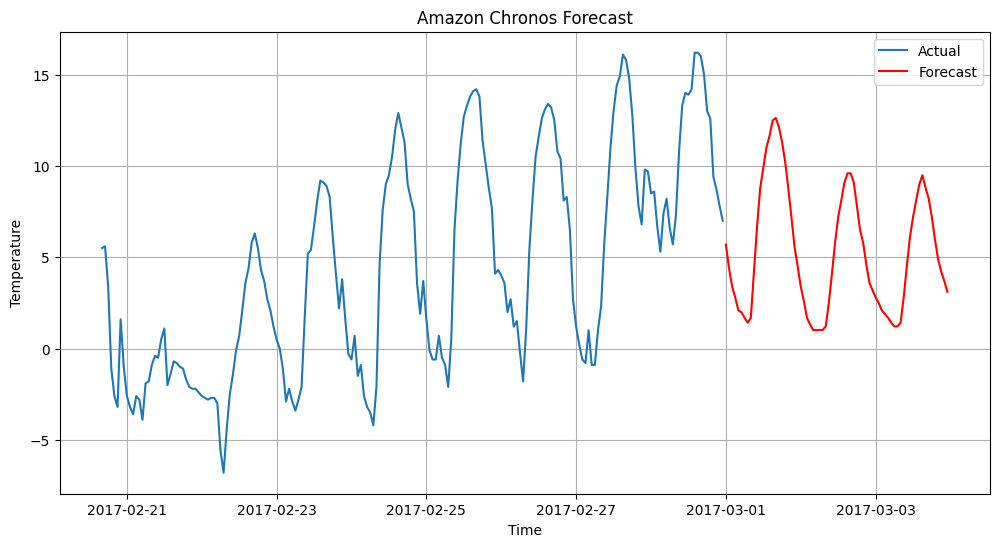

In [ ]:
# Plot the df with the forecast
plt.figure(figsize = (12, 6))

# Actual values
plt.plot(df[-200:], label = "Actual")
# Forecast values
plt.plot(forecast_series, label = "Forecast", color = "red")

# Set title, legend, and labels
plt.title("Amazon Chronos Forecast")
plt.ylabel("Temperature")
plt.xlabel("Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==1.8.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.2
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.7.7.0.39.39
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.8.0
bigquery-magics==0.10.1
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.5.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.1
build==1.2.2.post1
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.7.9
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.2
chex==0.1.89
chronos-forecasting @ git+https://github.com/amazon-science/chronos-forecasting.git@6a9c8dada